In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from skimage import morphology as morp

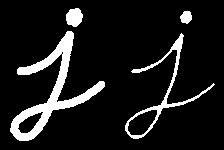

In [2]:
I = cv2.imread('j.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(I,kernel,iterations = 1)
cv2_imshow(np.hstack([I,erosion1]))

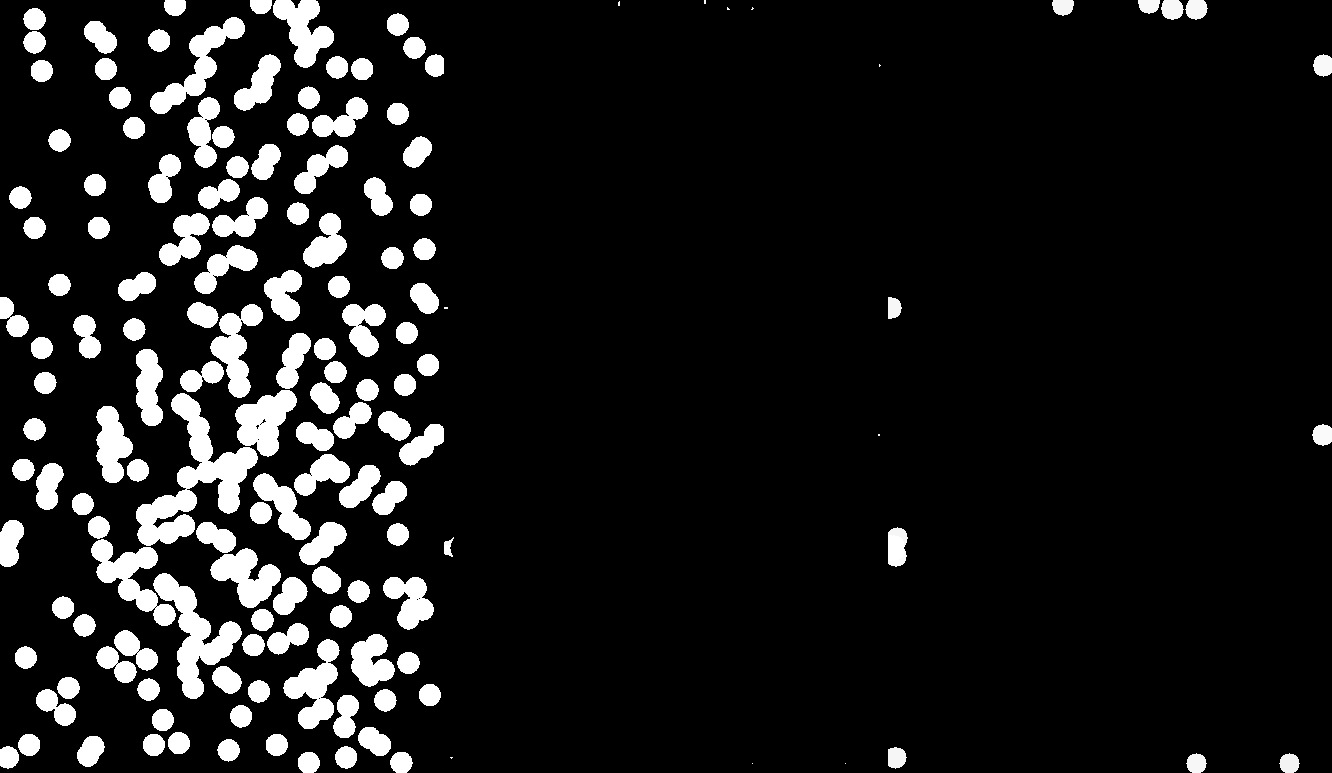

In [3]:
#coin exercise
#part1
coin=cv2.imread('coins.jpg',cv2.IMREAD_GRAYSCALE)
se=morp.disk(10)
erode1=cv2.erode(coin,se)
erode1[10:-10,10:-10]=0
bordercoins=cv2.dilate(erode1,se)
cv2_imshow(np.hstack([coin,erode1,bordercoins]))

Number of coins non-overlapping = 62 

Number of coins overlapping = 207 



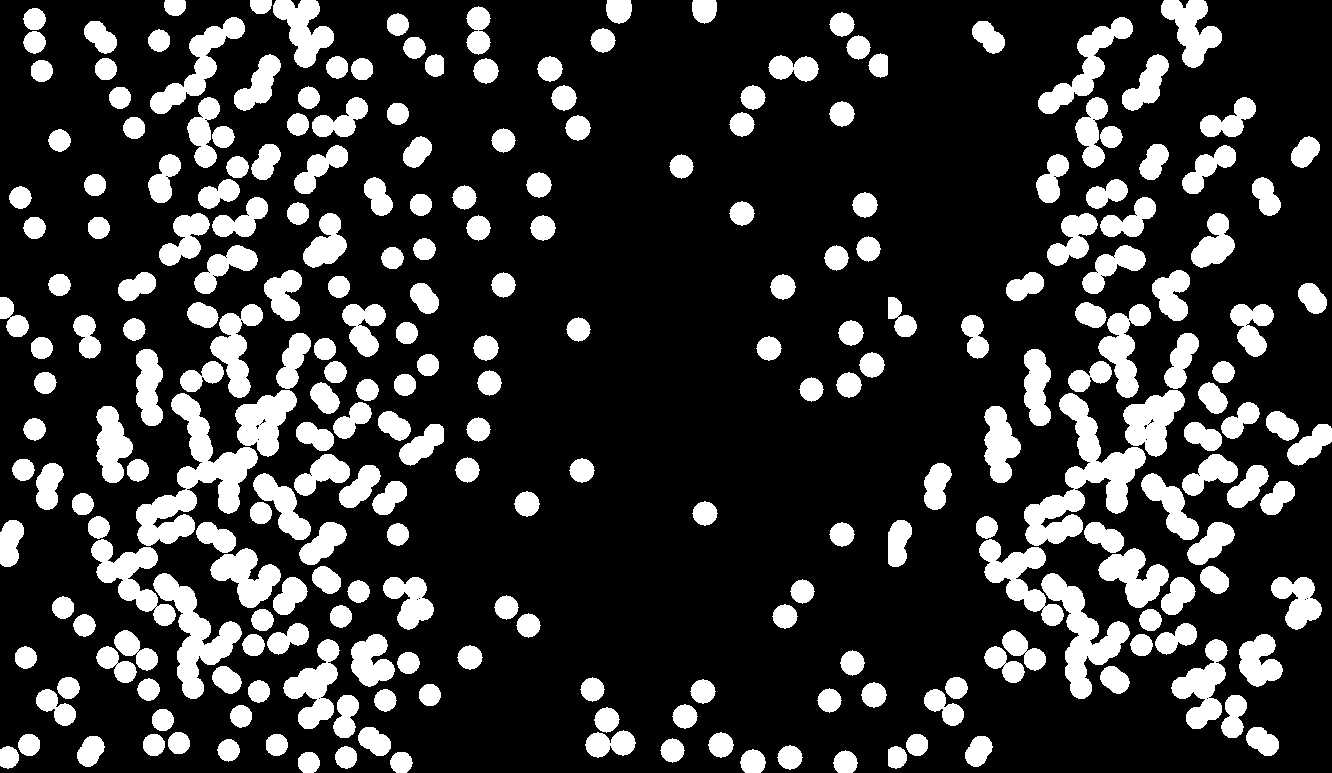

In [6]:
#Overlapping and non-overlapping coins
#Overlapping image is found by subtracting non-overlapping image from original image

I = cv2.imread('coins.jpg', cv2.IMREAD_GRAYSCALE)
ret,I = cv2.threshold(I,127,255,cv2.THRESH_BINARY)


kernel = morp.disk(12,dtype='int')
for i in range(len(kernel)):
  for j in range(len(kernel[i])):
    if(i==0 or i==len(kernel)-1 or j==0 or j==len(kernel)-1):
      kernel[i][j]=-1
    if(kernel[i][j]==1 and( i!=12 or j!=12)):
      kernel[i][j]=0






output_image = cv2.morphologyEx(I, cv2.MORPH_HITMISS, kernel)

kernel = morp.disk(12,np.uint8)

flag=np.zeros((output_image.shape[0],output_image.shape[1]))
count=0

for i in range(len(output_image)):
  for j in range(len(output_image[i])):
    if output_image[i][j]==255:
      if(flag[i][j]==0):
        count+=1
        for k in range(max(0,i-11),min(len(output_image),i+11)):
          for l in range(max(0,j-11),min(len(output_image[i]),j+11)):
            flag[k][l]=1
print("Number of coins non-overlapping =",count,"\n")



dilation = cv2.dilate(output_image,kernel,iterations = 1)
I2=I-dilation



erosion = cv2.erode(I2,morp.disk(10,np.uint8),iterations = 1)
flag=np.zeros((erosion.shape[0],erosion.shape[1]))
count=0
for i in range(len(erosion)):
  for j in range(len(erosion[i])):
    if erosion[i][j]==255:
      if(flag[i][j]==0):
        count+=1
        for k in range(max(0,i-11),min(len(erosion),i+11)):
          for l in range(max(0,j-11),min(len(erosion[i]),j+11)):
            flag[k][l]=1
print("Number of coins overlapping =",count,"\n")


cv2_imshow(np.hstack([I,dilation,I2]))